In [1]:
# import the packages
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

In [3]:
# load the dataset

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

#normalize the image pixels values
train_images = train_images / 255
test_images = test_images / 255

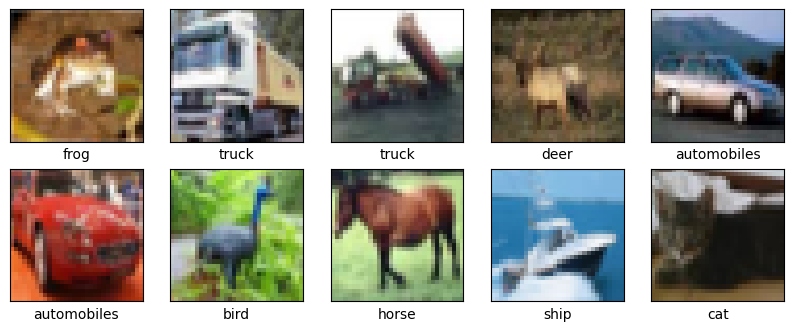

In [5]:
# display first 10 training images 

class_names = ['airplane', 'automobiles', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize = (10,10))

for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [9]:
# build the CNN model

model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation = 'relu'),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10)
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# compile the model

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# train the model
h = model.fit(
    train_images, train_labels,
    validation_data=(test_images, test_labels),
    epochs = 2
)

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.6289 - loss: 1.0517 - val_accuracy: 0.6441 - val_loss: 1.0042
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6709 - loss: 0.9404 - val_accuracy: 0.6674 - val_loss: 0.9498


In [14]:
# Evaluate the model performance

test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose = 2)

print("\n Test Loss : ",test_loss)
print("\n Test Accuarcy : ",test_accuracy)

313/313 - 3s - 8ms/step - accuracy: 0.6674 - loss: 0.9498

 Test Loss :  0.9498491287231445

 Test Accuarcy :  0.6674000024795532


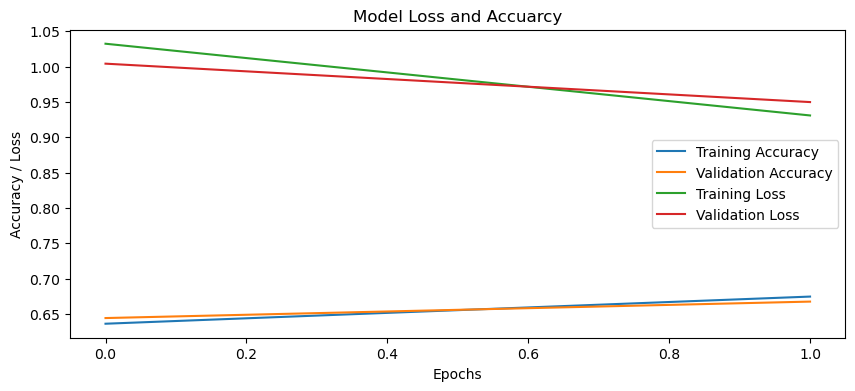

In [18]:
# Plotting the Loss and Accuarcy

plt.figure(figsize=(10,4))

plt.plot(h.history['accuracy'], label = "Training Accuracy")
plt.plot(h.history['val_accuracy'], label = "Validation Accuracy")
plt.plot(h.history['loss'], label = "Training Loss")
plt.plot(h.history['val_loss'], label = "Validation Loss")

plt.title("Model Loss and Accuarcy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy / Loss")
plt.legend()

In [ ]:
-